In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [2]:
path = Path('data/mnist_png/')

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, test='test',ds_tfms=tfms, size=26)

In [4]:
head = create_head(1024,10,lin_ftrs=[128])

In [5]:
learner = create_cnn(data, models.resnet18, custom_head=head, metrics=[accuracy])

In [6]:
learner.fit_one_cycle(1)

Total time: 03:33
epoch  train_loss  valid_loss  accuracy
1      0.327514    0.129927    0.958625  (03:33)



In [7]:
learner.save('stage-1')

In [8]:
learner.load('stage-1')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (54051 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: .
x: ImageItemList (54051 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png;
Valid: LabelList
y: CategoryList (8991 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: .
x: ImageItemList (8991 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png;
Test: LabelList
y: CategoryList (11 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: .
x: ImageItemList (11 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum

In [9]:
learner.unfreeze()

In [10]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


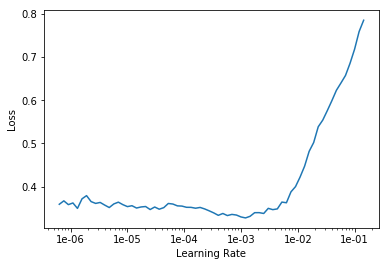

In [11]:
learner.recorder.plot()

In [12]:
learner.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:59
epoch  train_loss  valid_loss  accuracy
1      0.160560    0.041967    0.987543  (00:28)
2      0.114188    0.033394    0.990657  (00:31)



In [13]:
learner.save('stage-1-50')

In [14]:
learner.load('stage-1-50')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (54051 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: .
x: ImageItemList (54051 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png;
Valid: LabelList
y: CategoryList (8991 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: .
x: ImageItemList (8991 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png;
Test: LabelList
y: CategoryList (11 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: .
x: ImageItemList (11 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum

In [15]:
interp = ClassificationInterpretation.from_learner(learner)

In [16]:
interp.most_confused(min_val=2)

[('5', '3', 6),
 ('2', '3', 6),
 ('8', '3', 5),
 ('2', '7', 5),
 ('7', '1', 4),
 ('8', '0', 3),
 ('8', '4', 3),
 ('8', '2', 3),
 ('0', '6', 3),
 ('5', '8', 3),
 ('7', '4', 3),
 ('6', '0', 3),
 ('6', '5', 3),
 ('3', '8', 3),
 ('3', '5', 3)]

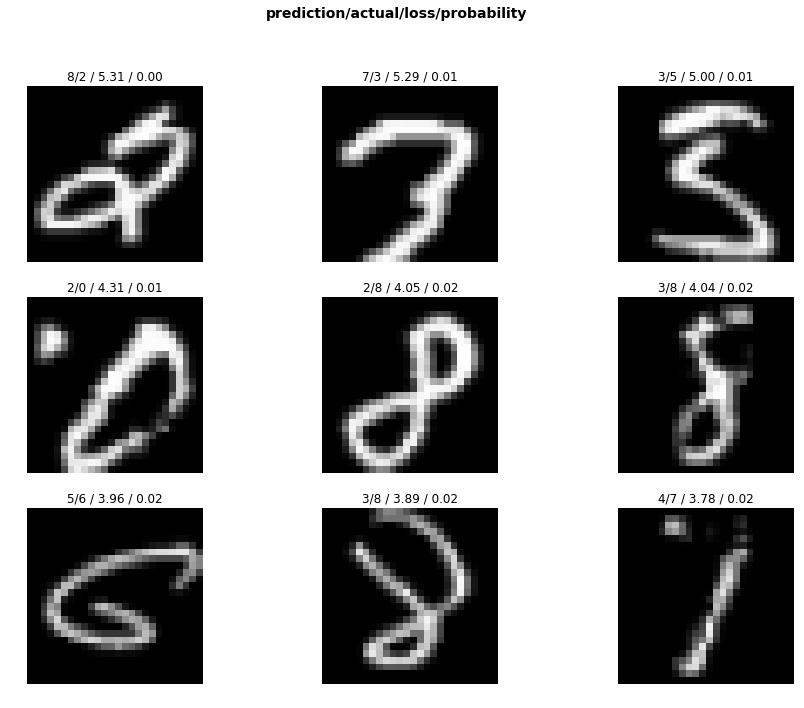

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

### Deep hash

In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [2]:
import fastai
# fastai.defaults.device = torch.device('cpu')

In [3]:
from fastai.callbacks import *

In [4]:
path = Path('data/mnist_png/')

In [5]:
head = create_head(1024,10,lin_ftrs=[128])

In [6]:
classes = list(range(9))

In [7]:
tfms = get_transforms(do_flip=False)
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=tfms, size=26).normalize(imagenet_stats)

In [8]:
learner = create_cnn(data2, models.resnet18, custom_head=head).load('stage-1-50')

In [9]:
class StoreHook2(Callback):
    def __init__(self, module):
        super().__init__()
        self.custom_hook = hook_output(module)
        self.outputs = []
        
    def on_batch_end(self, train, **kwargs): 
        if (not train): self.outputs.append(self.custom_hook.stored)

In [10]:
nn_module = learner.model[-1][-3]
learner.callbacks = [ StoreHook2(nn_module) ]

In [11]:
nn_module

BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [12]:
for i in (path/'test').iterdir():
    print(i)

data/mnist_png/test/78.png
data/mnist_png/test/92.png
data/mnist_png/test/2.png
data/mnist_png/test/58.png
data/mnist_png/test/100.png
data/mnist_png/test/12.png
data/mnist_png/test/9.png
data/mnist_png/test/20.png
data/mnist_png/test/5.png
data/mnist_png/test/73.png
data/mnist_png/test/14.png
data/mnist_png/test/16.png
data/mnist_png/test/62.png
data/mnist_png/test/7.png


In [13]:
learner.callbacks[0].outputs = []
for i in (path/'test').iterdir():
    learner.predict(open_image(i))

In [14]:
len(learner.callbacks[0].outputs)

14

In [15]:
for output in learner.callbacks[0].outputs:
    output = (output>0)

In [16]:
for i in range(len(learner.callbacks[0].outputs)):
    learner.callbacks[0].outputs[i] = learner.callbacks[0].outputs[i] > 0

In [17]:
learner.callbacks[0].outputs[1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
         1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 1, 1, 1, 1, 0, 0, 1]], device='cuda:0', dtype=torch.uint8)

In [18]:
learner.callbacks[0].outputs[0]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
         1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 1, 1, 1, 1, 0, 0, 1]], device='cuda:0', dtype=torch.uint8)

In [19]:
def similarity(ten1, ten2):
    return (ten1 == ten2).sum().float()/len(ten1)

In [20]:
for i in range(1,len(learner.callbacks[0].outputs)):
    print(similarity(learner.callbacks[0].outputs[i-1][0], learner.callbacks[0].outputs[i][0]))

tensor(0.9844, device='cuda:0')
tensor(0.9844, device='cuda:0')
tensor(0.9609, device='cuda:0')
tensor(0.9688, device='cuda:0')
tensor(0.9844, device='cuda:0')
tensor(0.9688, device='cuda:0')
tensor(0.9609, device='cuda:0')
tensor(0.9766, device='cuda:0')
tensor(0.9766, device='cuda:0')
tensor(0.9844, device='cuda:0')
tensor(0.9688, device='cuda:0')
tensor(0.9531, device='cuda:0')
tensor(0.9766, device='cuda:0')
